In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import cmocean
import palettable
import time
import csv
import ioeddy as io
from matplotlib import rc
import matplotlib.animation as animation



#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})

rc('text', usetex=True)

plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)

plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])

In [2]:
####......................Reading the grid file............................

nx, index, x, xe, xc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/fr2/x3_grid.in')
nr, index, r, re, rc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/fr2/x1_grid.in')
ntheta = 258
nr_trunc = nr - 10 + 1

print("Number of grid points in x direction", nx)
print("Number of grid points in r direction", nr)
print("Number of grid points in theta direction", ntheta)

Number of grid points in x direction 4609
Number of grid points in r direction 530
Number of grid points in theta direction 258


In [4]:
###..................Read series of slice cuts available......................

nstart = 2260100
nend   = 2360100
stride = 100


#path = '/home/sheel/Work2/projects_data/spod_re5e4/frinf/data_files/x_D_50/'
path = '/home/sheel/Work2/projects_data/spod_re5e4/fr2/data_files/x_D_10/'


file_header_1 = 'up_'
file_header_2 = 'vp_'
file_header_3 = 'wp_'


nit  =  int((nend-nstart)/stride + 1)
print('nit = ', nit)

## Looping over the window for plane files available

data_u_full = np.zeros((nr_trunc, ntheta, nit))
data_v_full = np.zeros((nr_trunc, ntheta, nit))
data_w_full = np.zeros((nr_trunc, ntheta, nit))

data_u_m = np.zeros((nr_trunc,ntheta))
data_v_m = np.zeros((nr_trunc,ntheta))
data_w_m = np.zeros((nr_trunc,ntheta))
    

for it in range(0,nit):

    file_number  =  nstart + it*stride

    print('Read file ', file_number)
    
    filename_1   =  path + file_header_1 + '%08d'%file_number + '_10.res'
    filename_2   =  path + file_header_2 + '%08d'%file_number + '_10.res'
    filename_3   =  path + file_header_3 + '%08d'%file_number + '_10.res'

    #print('Iteration:', it)

    data_u = np.fromfile(filename_1, dtype='float64')
    data_u = np.reshape(data_u, (ntheta, nr_trunc))
    data_u_full[:,:,it] = data_u.T
        
    data_v = np.fromfile(filename_2, dtype='float64')
    data_v = np.reshape(data_v, (ntheta, nr_trunc))
    data_v_full[:,:,it] = data_v.T
        
    data_w = np.fromfile(filename_3, dtype='float64')
    data_w = np.reshape(data_w, (ntheta, nr_trunc))
    data_w_full[:,:,it] = data_w.T

# ...... Mean velocity at axial slice for all three variables...... 
    data_u_m = data_u_m + (1.0/nit)*data_u.T
    data_v_m = data_v_m + (1.0/nit)*data_v.T           
    data_w_m = data_w_m + (1.0/nit)*data_w.T

nit =  1001
Read file  2260100
Read file  2260200
Read file  2260300
Read file  2260400
Read file  2260500
Read file  2260600
Read file  2260700
Read file  2260800
Read file  2260900
Read file  2261000
Read file  2261100
Read file  2261200
Read file  2261300
Read file  2261400
Read file  2261500
Read file  2261600
Read file  2261700
Read file  2261800
Read file  2261900
Read file  2262000
Read file  2262100
Read file  2262200
Read file  2262300
Read file  2262400
Read file  2262500
Read file  2262600
Read file  2262700
Read file  2262800
Read file  2262900
Read file  2263000
Read file  2263100
Read file  2263200
Read file  2263300
Read file  2263400
Read file  2263500
Read file  2263600
Read file  2263700
Read file  2263800
Read file  2263900
Read file  2264000
Read file  2264100
Read file  2264200
Read file  2264300
Read file  2264400
Read file  2264500
Read file  2264600
Read file  2264700
Read file  2264800
Read file  2264900
Read file  2265000
Read file  2265100
Read file  2265200


Read file  2305000
Read file  2305100
Read file  2305200
Read file  2305300
Read file  2305400
Read file  2305500
Read file  2305600
Read file  2305700
Read file  2305800
Read file  2305900
Read file  2306000
Read file  2306100
Read file  2306200
Read file  2306300
Read file  2306400
Read file  2306500
Read file  2306600
Read file  2306700
Read file  2306800
Read file  2306900
Read file  2307000
Read file  2307100
Read file  2307200
Read file  2307300
Read file  2307400
Read file  2307500
Read file  2307600
Read file  2307700
Read file  2307800
Read file  2307900
Read file  2308000
Read file  2308100
Read file  2308200
Read file  2308300
Read file  2308400
Read file  2308500
Read file  2308600
Read file  2308700
Read file  2308800
Read file  2308900
Read file  2309000
Read file  2309100
Read file  2309200
Read file  2309300
Read file  2309400
Read file  2309500
Read file  2309600
Read file  2309700
Read file  2309800
Read file  2309900
Read file  2310000
Read file  2310100
Read file  2

Read file  2349400
Read file  2349500
Read file  2349600
Read file  2349700
Read file  2349800
Read file  2349900
Read file  2350000
Read file  2350100
Read file  2350200
Read file  2350300
Read file  2350400
Read file  2350500
Read file  2350600
Read file  2350700
Read file  2350800
Read file  2350900
Read file  2351000
Read file  2351100
Read file  2351200
Read file  2351300
Read file  2351400
Read file  2351500
Read file  2351600
Read file  2351700
Read file  2351800
Read file  2351900
Read file  2352000
Read file  2352100
Read file  2352200
Read file  2352300
Read file  2352400
Read file  2352500
Read file  2352600
Read file  2352700
Read file  2352800
Read file  2352900
Read file  2353000
Read file  2353100
Read file  2353200
Read file  2353300
Read file  2353400
Read file  2353500
Read file  2353600
Read file  2353700
Read file  2353800
Read file  2353900
Read file  2354000
Read file  2354100
Read file  2354200
Read file  2354300
Read file  2354400
Read file  2354500
Read file  2

In [5]:
print(np.amax(data_u_m))
print(np.amin(data_u_m))
print(data_u_m.shape)

print(np.amax(data_v_m))
print(np.amin(data_v_m))
print(data_v_m.shape)

print(np.amax(data_w_m))
print(np.amin(data_w_m))
print(data_w_m.shape)

0.06474844202605085
-0.054493559773646824
(521, 258)
0.040924092150027964
-0.044353686405444015
(521, 258)
1.0172777320976019
0.8166904486017267
(521, 258)


In [6]:
###..................Creating the meshgrid.................................

v = 10
idx = (np.abs(v - rc)).argmin()
print(idx)

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 
R, THETA = np.meshgrid(rc[0:idx],azimuths)

R = R.T
THETA = THETA.T

print(R.shape)
print(THETA.shape)

333
(333, 258)
(333, 258)


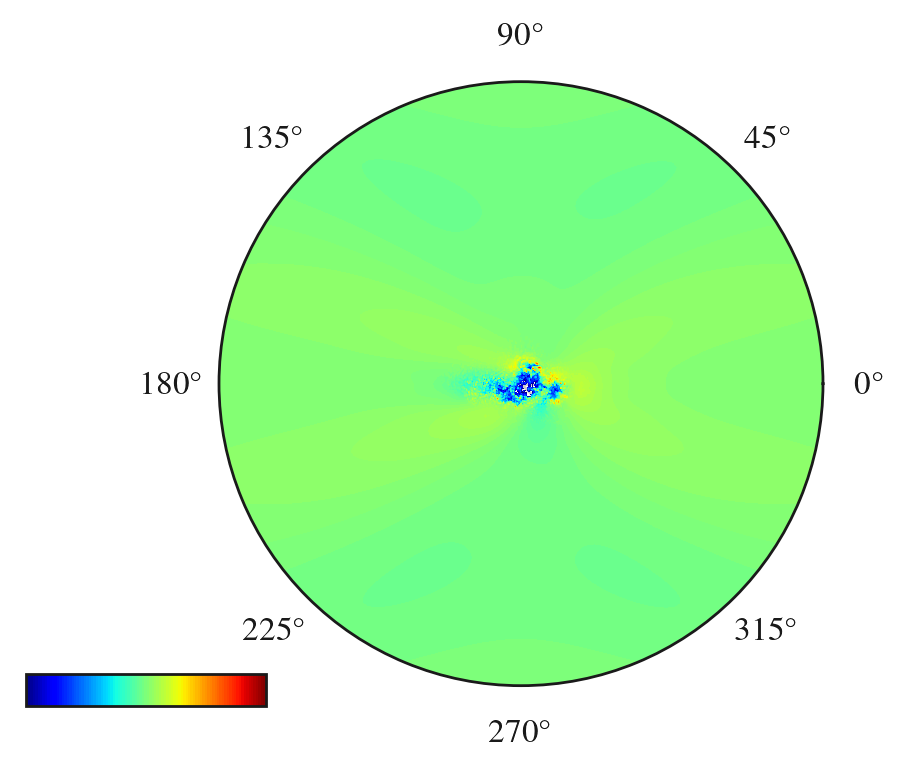

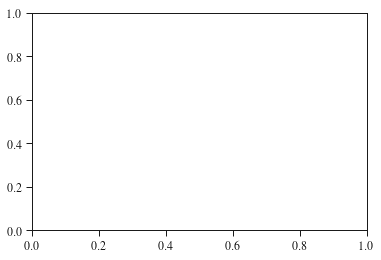

In [8]:
###..............................Animating the velocity field.............................

fps = 20 # frame per sec
frn = nit # frame number of the animation

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 200)
cs1     = ax.contourf(THETA, R, data_w_full[0:idx,:,0], cmap = 'jet', levels=np.linspace(0.8, 1.2,100))
cbaxes  = fig.add_axes([0.1, 0.1, 0.2, 0.04])
plt.colorbar(cs1, cax = cbaxes, orientation = 'horizontal', ticks = [0.5,1.5])
plt.show()

def update_plot(frn):
    ax.clear()
    cs1     = ax.contourf(THETA, R, data_w_full[0:idx,:,frn], cmap = 'jet', levels=np.linspace(0.8,1.2,100))
    plt.colorbar(cs1, cax = cbaxes, orientation = 'horizontal', ticks = [0.8,1.2])
    ax.set_aspect(1.0)

ani = animation.FuncAnimation(fig, update_plot, frn, interval=1000/fps)

fn = 'w_animation_fr2_x_D_10_2260100_2360100'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)

In [ ]:
###.......................Visualizing averaged velocity field.............................

#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 200)
cs1 = ax1.contourf(THETA, R, data_u_m[0:idx,:], cmap = 'hsv', levels=np.linspace(-0.1,0.1,100))
cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [-0.1,0.1])
ax1.set_aspect(1.0)
plt.show()

In [ ]:
###............................Plotting  w averaged velocity along different lines...............

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 

r_loc = 10
r_index = io.loc(rc, r_loc)

print(r_index)
print('Minimum of averaged velocity at this radial location ',np.amin(data_w_m[r_index,:]))
print('Maximum of averaged velocity at this radial location ',np.amax(data_w_m[r_index,:]))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(6,3), dpi=200)

h1 = plt.plot(azimuths, data_w_m[r_index,:])
plt.ylim(0.95, 1.05)

plt.setp(h1, color = 'k', linewidth = 2.0)

plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$W_{averaged}$',fontsize = 16)

plt.xticks(fontsize = 16); plt.yticks(fontsize = 16)

plt.show()

In [ ]:
###.......................Plotting u averaged velocity along different lines........................

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 

r_loc = 4
r_index = io.loc(rc, r_loc)

print(r_index)
print('Minimum of averaged velocity at this radial location ',np.amin(data_u_m[r_index,:]))
print('Maximum of averaged velocity at this radial location ',np.amax(data_u_m[r_index,:]))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(6,3), dpi=200)

h1 = plt.plot(azimuths, data_u_m[r_index,:])
#plt.ylim(-0.01, 0.01)

plt.setp(h1, color = 'k', linewidth = 2.0)

plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$U_{averaged}$',fontsize = 16)

plt.xticks(fontsize = 16); plt.yticks(fontsize = 16)

plt.show()

In [ ]:
###...............................Plotting v averaged velocity along different lines.................

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 

r_loc = 0.5
r_index = io.loc(rc, r_loc)

print(r_index)
print('Minimum of averaged velocity at this radial location ',np.amin(data_v_m[r_index,:]))
print('Maximum of averaged velocity at this radial location ',np.amax(data_v_m[r_index,:]))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(6,3), dpi=200)

h1 = plt.plot(azimuths, data_v_m[r_index,:])
plt.ylim(-0.01, 0.01)

plt.setp(h1, color = 'k', linewidth = 2.0)

plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$V_{averaged}$',fontsize = 16)

plt.xticks(fontsize = 16); plt.yticks(fontsize = 16)

plt.show()

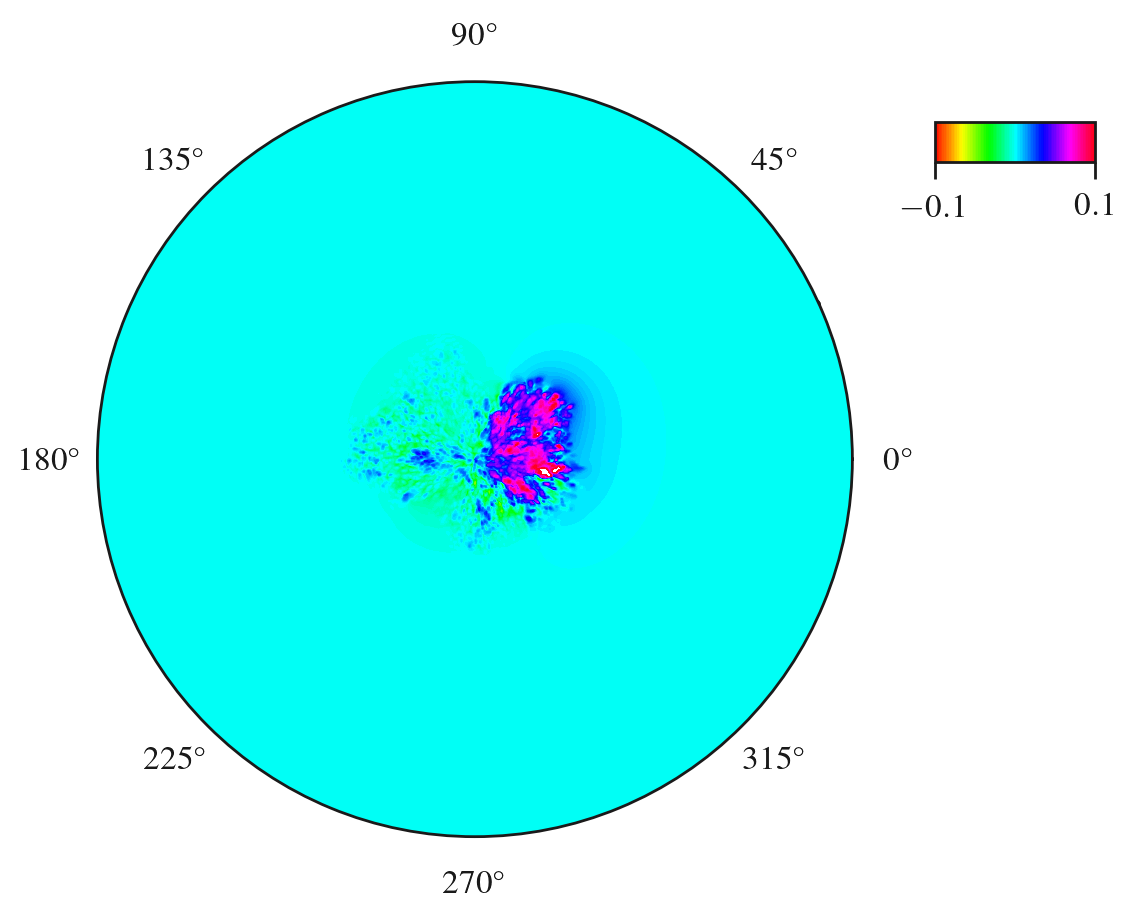

In [87]:
##........................Visualization of velocity field at any given iteration............

path = '/home/sheel/Work2/projects_data/spod_re5e4/frinf/data_files/x_D_50/'

file_header = 'up_'

niteration = 2000000

filename   =  path + file_header + '%08d'%niteration + '_50.res'

data = np.fromfile(filename, dtype='float64')
data = np.reshape(data, (ntheta, nr_trunc))
data = data.T

# Visualizing averaged  v velocity field

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta) 
R, THETA = np.meshgrid(rc[:-10], azimuths)

R = R.T
THETA = THETA.T

#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 200)
cs1 = ax1.contourf(THETA, R, data, cmap = 'hsv', levels=np.linspace(-0.1,0.1,100))
cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [-0.1,0.1])
ax1.set_aspect(1.0)
plt.show()